In [1]:
from matplotlib import pyplot as plt

from methods import *
from problem_parmeters_generator import generate_points_to_cover

dim = 2
Q_radius = 1_000
x_solution = np.random.randn(dim)
radius = np.random.randint(1, Q_radius//2)
print("radius: ", radius)
# solution + radius should fit into Q set.
if np.linalg.norm(x_solution) + radius > Q_radius:
    x_solution = (x_solution / np.linalg.norm(x_solution)) * (Q_radius - radius - 1)
print("x_solution: ", x_solution[0:6], " radius: ", radius, " solution norm: ", np.linalg.norm(x_solution),
      " sum: ", np.linalg.norm(x_solution) + radius)
points_to_cover = generate_points_to_cover(x_solution, radius, 2)

radius:  14
x_solution:  [ 1.40062405 -0.78321783]  radius:  14  solution norm:  1.604736079463617  sum:  15.604736079463617
norm:  14.0
center:  [ 1.40062405 -0.78321783]
corr l:  [ -6.05580127 -12.63234107]
diam:  [ 8.85704936 11.06590541]


In [ ]:
c = np.array([-1.11180359, -1.25603567])
x_f = np.array([ -14.55887278, -139.60406179])
x_d = c - x_f
print(x_d)
print(x_d * 2)

In [2]:
circle1 = plt.Circle(c, np.linalg.norm(c-x_f), color='r', fill=False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_patch(circle1)
ax.scatter(x_f[0], x_f[1], color="k")
ax.scatter(x_d[0], x_d[1], color="c")
ax.scatter(c[0], c[1], color="m")


plt.show()

NameError: name 'c' is not defined

[ 8.85704936 11.06590541]
2:  [4.42852468 5.53295271]
np.sqrt(2):  [6.26287966 7.82477676]


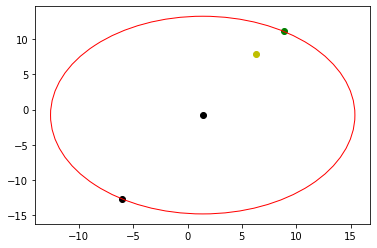

In [4]:
circle1 = plt.Circle(x_solution, radius, color='r', fill=False)
circle2 = plt.Circle((0, 0), Q_radius, color='b', fill=False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_patch(circle1)
# ax.add_patch(circle2)
#for point in points_to_cover:
ax.scatter(points_to_cover[0][0], points_to_cover[0][1], color="k")
ax.scatter(x_solution[0], x_solution[1], color="k")
ax.scatter(points_to_cover[1][0], points_to_cover[1][1], color="g")
ax.scatter(points_to_cover[1][0]/np.sqrt(2), points_to_cover[1][1]/np.sqrt(2), color="y")
print(points_to_cover[1])
print("2: ", points_to_cover[1]/2)
print("np.sqrt(2): ", points_to_cover[1]/np.sqrt(2))
plt.show()

In [5]:
from problems import *

M = 4  # np.linalg.norm(fun.call_grad(x_0))
n_exp = 1
mu = 2
n_iter = 100  # 2 * (M ** 2) / (mu * epsilon)
print("min n_iter: ", n_iter)
n_iter *= 1.2
n_iter = int(n_iter + 1)
print("int n_iter: ", n_iter)

x_args_array = np.zeros((n_exp, n_iter, dim))
f_vals_array = np.zeros((n_exp, n_iter))
f_raw_vals_array = np.zeros((n_exp, n_iter))
g_norm_array = np.zeros((n_exp, n_iter))
x_solutions = np.zeros((n_exp, dim))
f_solutions = np.zeros(n_exp)

for exp in range(n_exp):
    print("============exp#{}============".format(exp))
    Q_radius = 1_000
    x_solution = np.random.randn(dim)
    radius = np.random.randint(1, Q_radius//2)
    # solution + radius should fit into Q set.
    if np.linalg.norm(x_solution) + radius > Q_radius:
        x_solution = (x_solution / np.linalg.norm(x_solution)) * (Q_radius - radius - 1)
    print("x_solution: ", x_solution[0:6], " radius: ", radius, " solution norm: ", np.linalg.norm(x_solution),
          " sum: ", np.linalg.norm(x_solution) + radius)
    points_to_cover = generate_points_to_cover(x_solution, radius, 2)

    fun = Fun(covering_sphere_problem(points_to_cover))
    method = SubgradientMirrorDescent(strongly_convex_fun_const=mu, q_set_radius=Q_radius)

    x_solutions[exp] = list(x_solution)
    f_solutions[exp] = fun.call_f(x_solution)

    x_0 = np.random.randn(dim)

    x_args_array[exp, :], f_vals_array[exp, :], f_raw_vals_array[exp, :] = method.minimize(x_0, fun, n_iter=n_iter)
    g_norm_array[exp, :] = np.array([np.linalg.norm(fun.call_grad(x)) for x in x_args_array[exp]])

    print("last optimized value: ", f_vals_array[exp][-1])
    print("solution value      : ", f_solutions[exp])
    print("last optimized arg: ", x_args_array[exp][-1])
    print("solution arg      : ", x_solution)
    print(f'$x_k - x_*$:', np.linalg.norm(x_args_array[exp] - x_solution))
    print("radius: ", np.linalg.norm(x_args_array[exp] - points_to_cover[0]))
    print(f'solution radius:', np.linalg.norm(x_solution - points_to_cover[0]))

min n_iter:  100
int n_iter:  121
============exp#0============
x_solution:  [ 0.31232385 -0.23748221]  radius:  332  solution norm:  0.392356967121305  sum:  332.3923569671213
norm:  332.0
center:  [ 0.31232385 -0.23748221]
corr l:  [116.90391834 310.61682465]
diam:  [-116.27927063 -311.09178907]
iter     :  50
h        :  0.0196078431372549
gr       :  [237.94202956 634.39654462]
x        :  [-1.97378584 -6.3326647 ]
iter     :  100
h        :  0.009900990099009901
gr       :  [235.53857472 627.98849871]
x        :  [-0.84204837 -3.31524763]
last optimized value:  110314.57450216051
solution value      :  110224.0
last optimized arg:  [-0.65124304 -2.80652607]
solution arg      :  [ 0.31232385 -0.23748221]
$x_k - x_*$: 401.0443215250617
radius:  3644.2486705230435
solution radius: 332.0


norm:  43.0
solution:  [-1.21710862 -0.67371737]


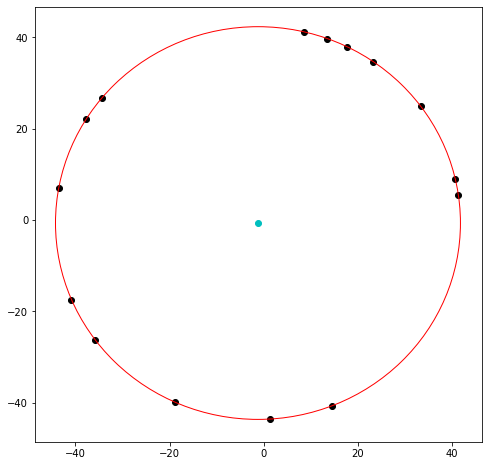

In [4]:
import numpy as np
from problem_parmeters_generator import generate_points_to_cover
from matplotlib import pyplot as plt

Q_radius = 1_000
dim = 2
x_solution = np.random.randn(dim)
radius = np.random.randint(1, Q_radius//2)

points_to_cover = generate_points_to_cover(x_solution, radius, 15)

circle1 = plt.Circle(x_solution, radius, color='r', fill=False)
print("solution: ", x_solution)
circle2 = plt.Circle((0, 0), Q_radius, color='b', fill=False)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_patch(circle1)
#ax.add_patch(circle2)
for point in points_to_cover:
    ax.scatter(point[0], point[1], color="k")
# for x_k in x_args_array[0]:
#     ax.scatter(x_k[0], x_k[1], color="g")
# ax.scatter(x_0[0], x_0[1], color="y")
ax.scatter(x_solution[0], x_solution[1], color="c")
# print("diff solution - start     : ", x_solution - x_0)
# print("diff solution - start norm: ", np.linalg.norm(x_solution - x_0))
#print("diff solution - end       : ", x_k - x_0)
#print("diff solution - end norm  : ", np.linalg.norm(x_k - x_0))

#ax.scatter(x_args_array[0][-1][0], x_args_array[0][-1][1], color="m")
plt.show()

In [36]:
prefix = "./experiments/SubgradientMirrorDescent/covering_sphere_problem_strong_convex/"
rad_5 = np.load(prefix + "exp#0_iter#1729_qRadius#6_dim#1500_r#5.npz")
rad_10 = np.load(prefix + "exp#0_iter#1729_qRadius#6_dim#1500_r#10.npz")
rad_20 = np.load(prefix + "exp#0_iter#1729_qRadius#6_dim#1500_r#20.npz")
rad_100 = np.load(prefix + "exp#0_iter#1729_qRadius#6_dim#1500_r#100.npz")

n_it = 1729
f_vals_5 = rad_5["f_vals"][0]
f_solution_5 = rad_5["f_solution"]
g_norm_array_5 = rad_5["g_norm"]
f_vals_10 = rad_10["f_vals"][0]
f_solution_10 = rad_10["f_solution"]
g_norm_array_10 = rad_10["g_norm"]
f_vals_20 = rad_20["f_vals"][0]
f_solution_20 = rad_20["f_solution"]
g_norm_array_20 = rad_20["g_norm"]
f_vals_100 = rad_100["f_vals"][0]
f_solution_100 = rad_100["f_solution"]
g_norm_array_100 = rad_100["g_norm"]

In [37]:
def adaptive(i, g_norm):
    # this part cut due to small irrelevant values on a small amount of iterations
    if i < 10:
        return 10
    return (2 / (2 * i * (i + 1))) * np.sum(
        [k * np.square(g_norm[0][k]) / (k + 1) for k in range(i)], axis=0)

def non_adaptive(i):
    return 2 * ((2*6) ** 2) / (2 * (i + 1))

f_vals shape:  (1729,)
1 shapes:  (1729,)
[416.49591497 416.49591497  48.04209682  13.39226345   5.56756326
   2.98273214   1.91869509   1.38441589   1.06960482   0.86240496]
1 disc:  (1729,)


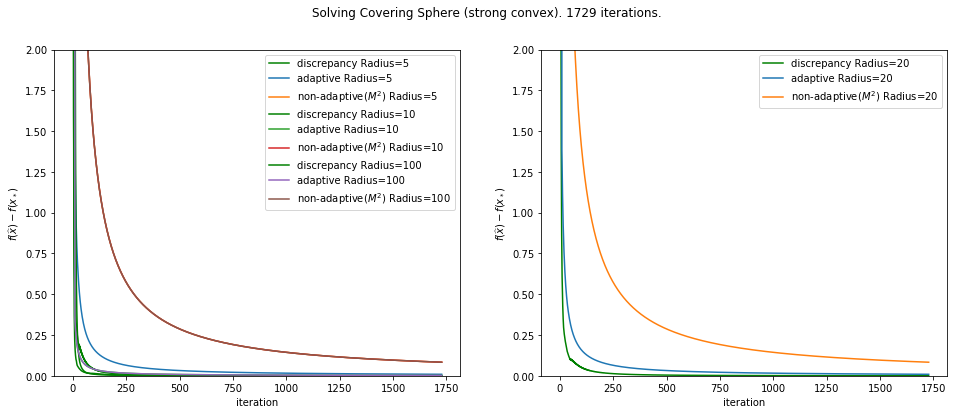

In [46]:

fig = plt.figure(figsize=(16, 6))
print("f_vals shape: ", f_vals.shape)
fig.suptitle(f'Solving Covering Sphere (strong convex). 1729 iterations.')

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel(f'$f(\widehat{{x}}) - f(x_*)$')

print("1 shapes: ", f_vals.shape)
print([f_vals - f_solution][0][0:10])
f_discrepancy = np.array([f_vals - f_solution][0])
print("1 disc: ", f_discrepancy.shape)

ax.set_xlabel('iteration')
ax.set_ylim([0, 2])
ax.plot(np.arange(n_it), np.array([f_vals_5 - f_solution_5][0]), label="discrepancy Radius=5", color="g")

ax.plot(list(range(n_it)), [adaptive(iter, g_norm_array_5) for iter in range(n_it)],
        label="adaptive Radius=5")

ax.plot(list(range(n_it)), [non_adaptive(iter) for iter in range(n_it)],
        label=f'non-adaptive($M^2$) Radius=5')

ax.plot(np.arange(n_it), np.array([f_vals_10 - f_solution_10][0]), label="discrepancy Radius=10", color="g")

ax.plot(list(range(n_it)), [adaptive(iter, g_norm_array_10) for iter in range(n_it)],
        label="adaptive Radius=10")

ax.plot(list(range(n_it)), [non_adaptive(iter) for iter in range(n_it)],
        label=f'non-adaptive($M^2$) Radius=10')

ax.plot(np.arange(n_it), np.array([f_vals_100 - f_solution_100][0]), label="discrepancy Radius=100", color="g")

ax.plot(list(range(n_it)), [adaptive(iter, g_norm_array_100) for iter in range(n_it)],
        label="adaptive Radius=100")

ax.plot(list(range(n_it)), [non_adaptive(iter) for iter in range(n_it)],
        label=f'non-adaptive($M^2$) Radius=100')

ax.legend(loc="upper right")

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel(f'$f(\widehat{{x}}) - f(x_*)$')

ax.set_xlabel('iteration')
ax.set_ylim([0, 2])
ax.plot(np.arange(n_it), np.array([f_vals_20 - f_solution_20][0]), label="discrepancy Radius=20", color="g")

ax.plot(list(range(n_it)), [adaptive(iter, g_norm_array_20) for iter in range(n_it)],
        label="adaptive Radius=20")

ax.plot(list(range(n_it)), [non_adaptive(iter) for iter in range(n_it)],
        label=f'non-adaptive($M^2$) Radius=20')
ax.legend(loc="upper right")

plt.show()

In [ ]:
fig = plt.figure(figsize=(, 6))
print("f_vals shape: ", f_vals.shape)
fig.suptitle(f'Solving Covering Sphere (strong convex). 1729 iterations.')


ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel(f'$f(\widehat{{x}}) - f(x_*) Radius = 20$')

ax.set_xlabel('iterations')
ax.set_ylim([0, 2])
ax.plot(np.arange(n_it), np.array([f_vals_20 - f_solution_20][0]), label="discrepancy Radius=20", color="g")

ax.plot(list(range(n_it)), [adaptive(iter, g_norm_array_20) for iter in range(n_it)],
        label="adaptive Radius=20")

ax.plot(list(range(n_it)), [non_adaptive(iter) for iter in range(n_it)],
        label=f'non-adaptive($M^2$) Radius=20')
ax.legend(loc="upper right")

plt.show()